In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/sample_data/ev2_bikewale.csv")

print(df.shape)
print(df.isnull().sum())
df.head()

(844, 14)
review                 47
Used it for             0
Owned for               0
Ridden for            176
rating                  0
Visual Appeal         105
Reliability           128
Performance           499
Service Experience    141
Extra Features        659
Comfort               314
Maintenance cost      664
Value for Money       454
Model Name              0
dtype: int64


,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [2]:
df.drop(columns=['Ridden for','Extra Features','Value for Money','Maintenance cost'],inplace=True)
df.dropna(subset=['review'],inplace=True)
df.isnull().sum()

review                  0
Used it for             0
Owned for               0
rating                  0
Visual Appeal         103
Reliability           122
Performance           456
Service Experience    136
Comfort               311
Model Name              0
dtype: int64

In [3]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

<ipython-input-3-922ffc95d673>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace=True)


review                0
Used it for           0
Owned for             0
rating                0
Visual Appeal         0
Reliability           0
Performance           0
Service Experience    0
Comfort               0
Model Name            0
dtype: int64

In [4]:
# Display summary statistics
print(df.describe())

           rating  Visual Appeal  Reliability  Performance  \
count  797.000000     797.000000   797.000000   797.000000   
mean     3.304893       3.743516     3.263704     3.513196   
std      1.705339       1.276156     1.474686     0.986842   
min      1.000000       1.000000     1.000000     1.000000   
25%      1.000000       3.000000     2.000000     3.513196   
50%      4.000000       4.000000     3.263704     3.513196   
75%      5.000000       5.000000     5.000000     4.000000   
max      5.000000       5.000000     5.000000     5.000000   

       Service Experience     Comfort  
count          797.000000  797.000000  
mean             3.087746    3.625514  
std              1.504145    1.099248  
min              1.000000    1.000000  
25%              1.000000    3.625514  
50%              3.087746    3.625514  
75%              4.000000    4.000000  
max              5.000000    5.000000  


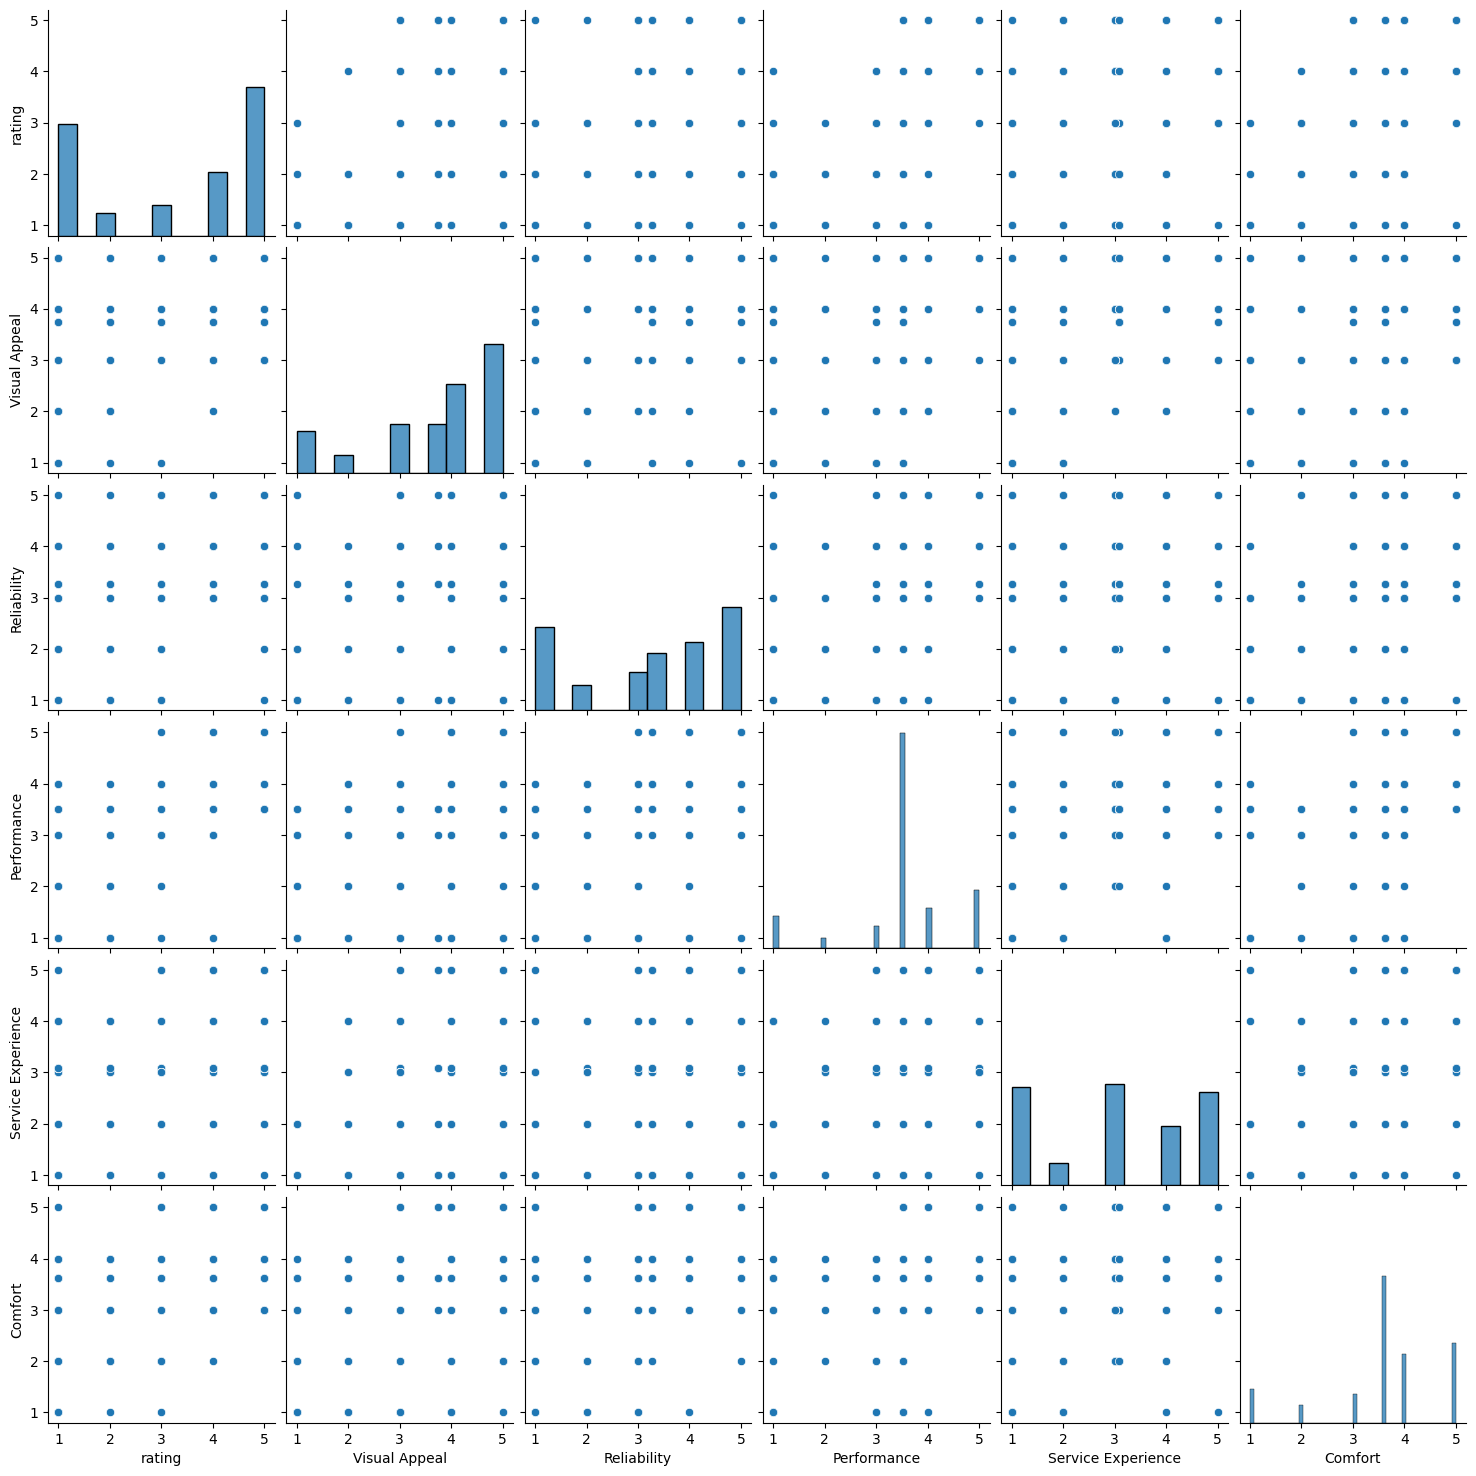

In [5]:
# Data visualization
sns.pairplot(df)
plt.show()

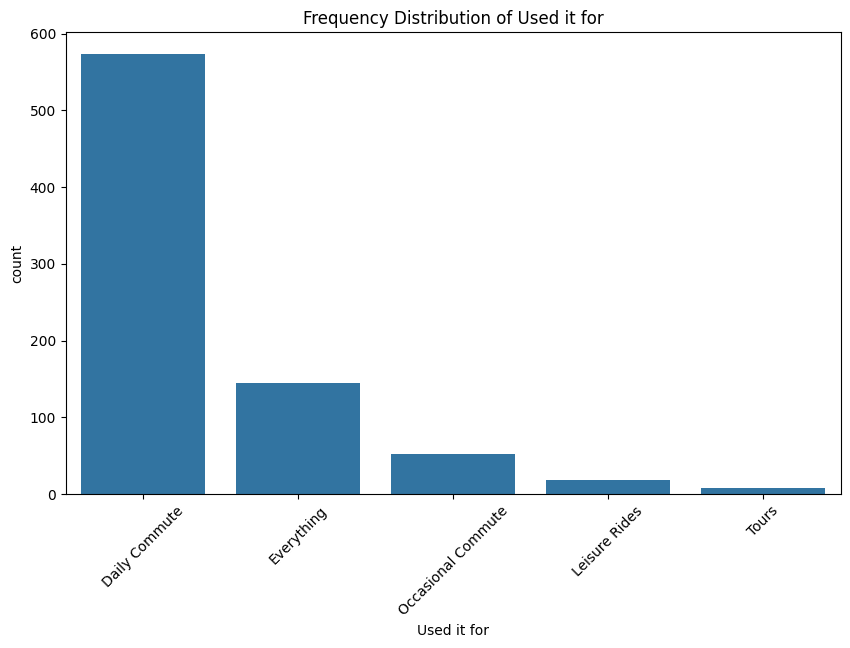

<ipython-input-6-dbb6c85e8758>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


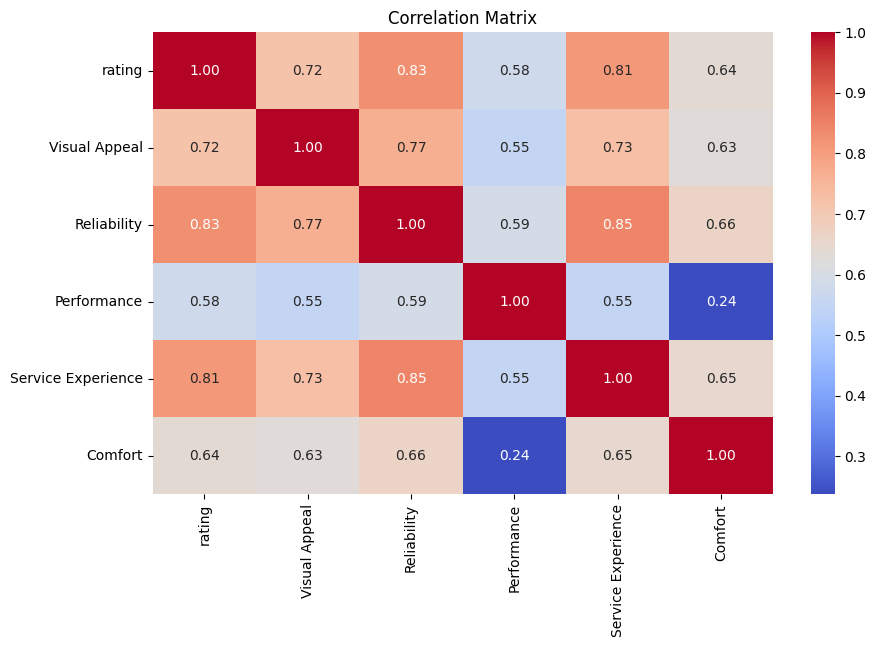

review                0
Used it for           0
Owned for             0
rating                0
Visual Appeal         0
Reliability           0
Performance           0
Service Experience    0
Comfort               0
Model Name            0
dtype: int64


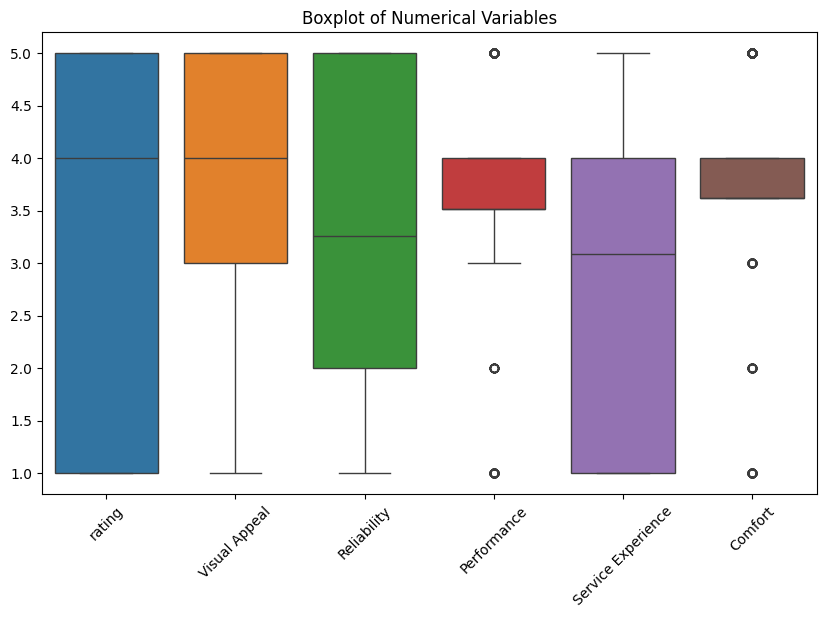

In [6]:
# Frequency distribution of categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Used it for', data=df)
plt.xticks(rotation=45)
plt.title('Frequency Distribution of Used it for')
plt.show()

# Correlation analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Check for missing values
print(df.isnull().sum())

# Check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

### **Performance-Oriented Segment** - Performance, Reliability

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


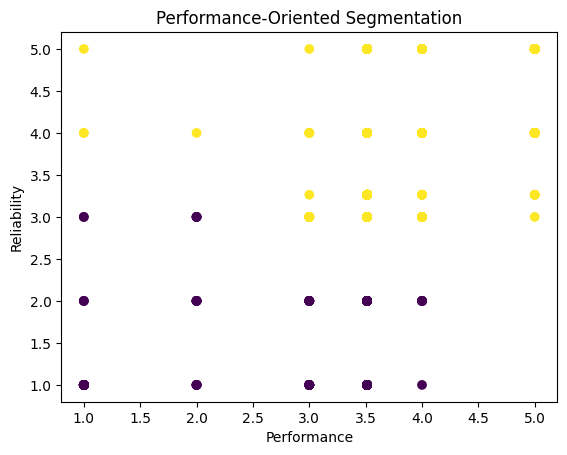

     Performance  Reliability  Segment
0       3.513196          4.0        1
1       3.513196          1.0        0
2       3.513196          4.0        1
3       3.513196          1.0        0
4       3.513196          4.0        1
..           ...          ...      ...
839     3.513196          2.0        0
840     5.000000          5.0        1
841     4.000000          2.0        0
842     3.513196          4.0        1
843     3.513196          4.0        1

[797 rows x 3 columns]


In [7]:
from sklearn.cluster import KMeans

# Select features for segmentation
X = df[['Performance', 'Reliability']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Segment'] = kmeans.fit_predict(X)

# Plot the clusters
plt.scatter(df['Performance'], df['Reliability'], c=df['Segment'], cmap='viridis')
plt.xlabel('Performance')
plt.ylabel('Reliability')
plt.title('Performance-Oriented Segmentation')
plt.show()

# Print the segmentation results
print(df[['Performance', 'Reliability', 'Segment']])

## **Usage-Based Segmentation** - Used it for, Owned for

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


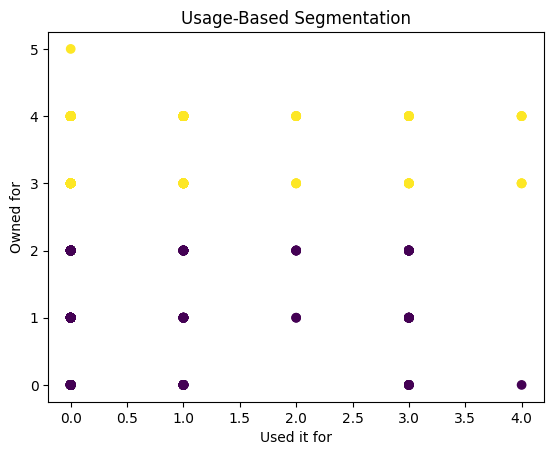

     Used it for  Owned for  Segment
0              0          4        1
1              1          3        1
2              0          2        0
3              0          1        0
4              0          1        0
..           ...        ...      ...
839            0          3        1
840            1          2        0
841            0          3        1
842            0          0        0
843            0          0        0

[797 rows x 3 columns]


In [8]:
# Encode categorical variables
df['Used it for'] = df['Used it for'].astype('category').cat.codes
df['Owned for'] = df['Owned for'].astype('category').cat.codes

# Select features for segmentation
X = df[['Used it for', 'Owned for']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Segment'] = kmeans.fit_predict(X)

# Plot the clusters
plt.scatter(df['Used it for'], df['Owned for'], c=df['Segment'], cmap='viridis')
plt.xlabel('Used it for')
plt.ylabel('Owned for')
plt.title('Usage-Based Segmentation')
plt.show()

# Print the segmentation results
print(df[['Used it for', 'Owned for', 'Segment']])

## **Value-Based Segmentation** - Review, Visual Appeal

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


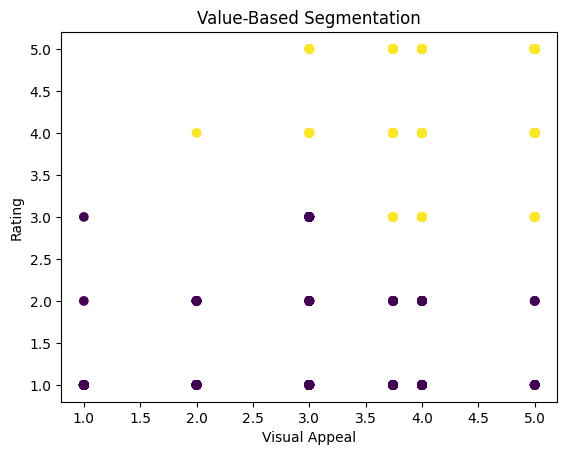

     Visual Appeal  rating  Segment
0              3.0       1        0
1              3.0       1        0
2              4.0       3        1
3              1.0       1        0
4              3.0       1        0
..             ...     ...      ...
839            2.0       2        0
840            5.0       5        1
841            2.0       2        0
842            4.0       5        1
843            3.0       4        1

[797 rows x 3 columns]


In [10]:
# Select features for segmentation
X = df[['Visual Appeal', 'rating']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Segment'] = kmeans.fit_predict(X)

# Plot the clusters
plt.scatter(df['Visual Appeal'], df['rating'], c=df['Segment'], cmap='viridis')
plt.xlabel('Visual Appeal')
plt.ylabel('Rating')
plt.title('Value-Based Segmentation')
plt.show()

# Print the segmentation results
print(df[['Visual Appeal', 'rating', 'Segment']])